In [11]:
!pip install imblearn

In [13]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 


In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")


In [15]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#EXPLORATORY DATA ANALYSIS(EDA)

In [16]:
df.shape

(1599, 12)

In [17]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
#Since there are many gaps present between across the table, especially between the 75% and max in the residual sugar, free sulfur & total sulfur dioxides coloumns indicating the presence of outliers.

In [21]:
df.skew() #acceptable range is (+/-0.5)

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [22]:
#DATA VISUALIZATION

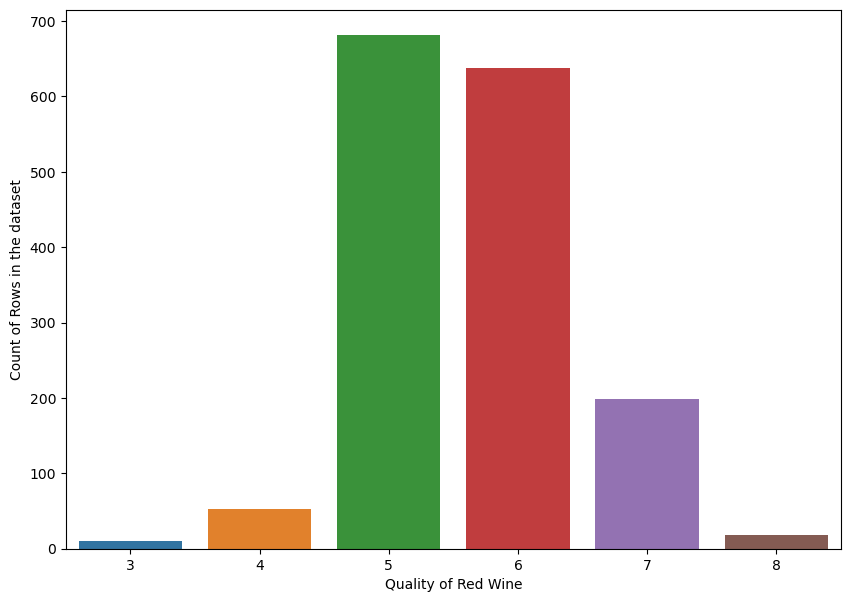

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

In [24]:
#The above cunplot shows various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than the rest, which indicates an imbalance that needs to be corrected before implementing the ML model.

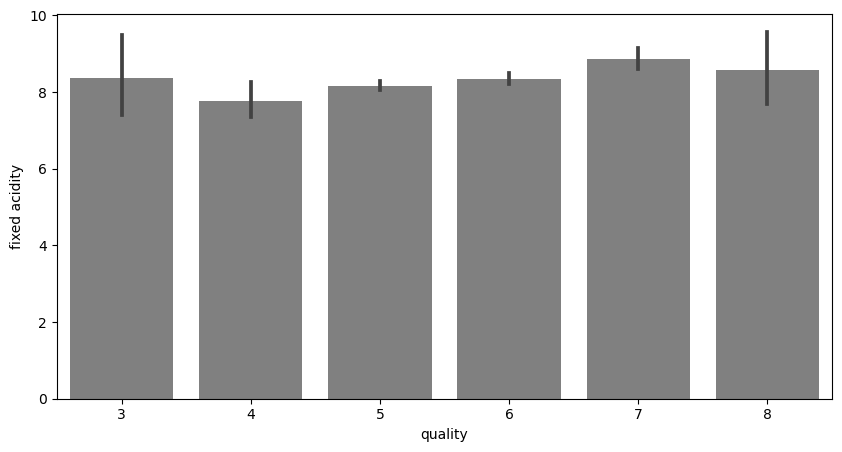

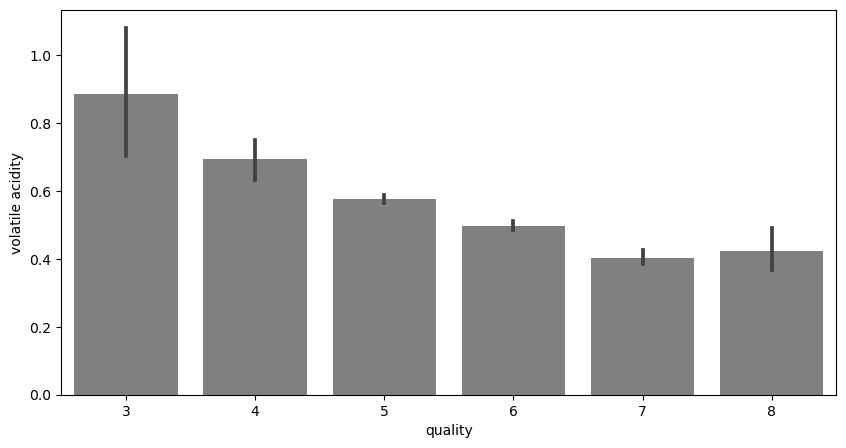

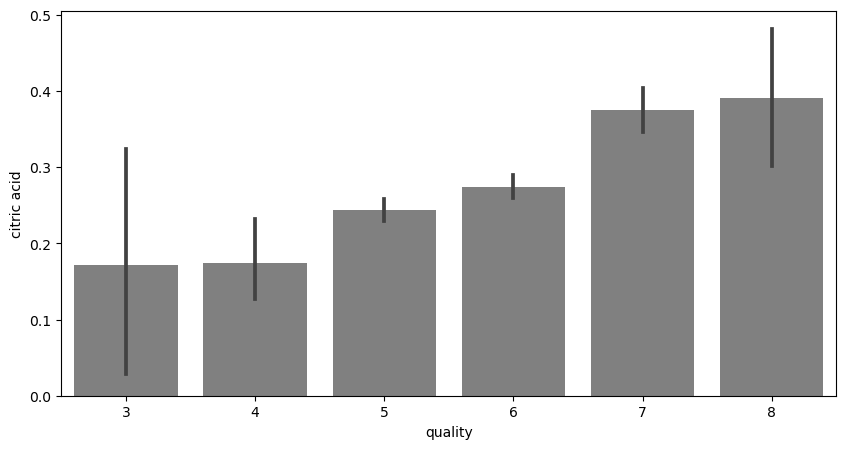

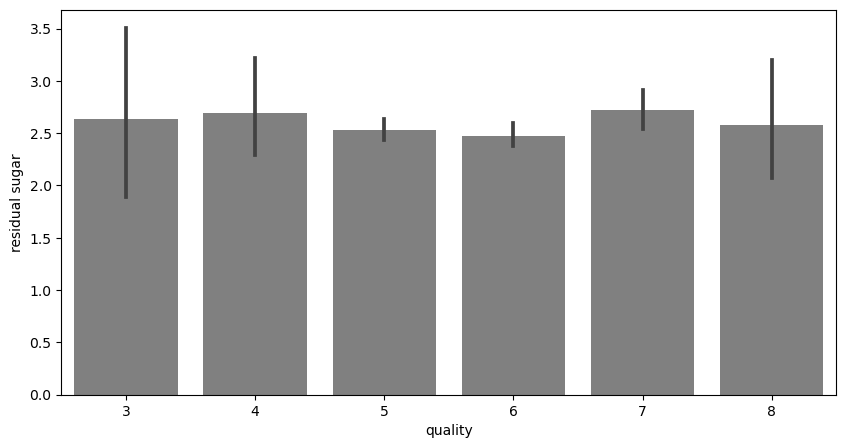

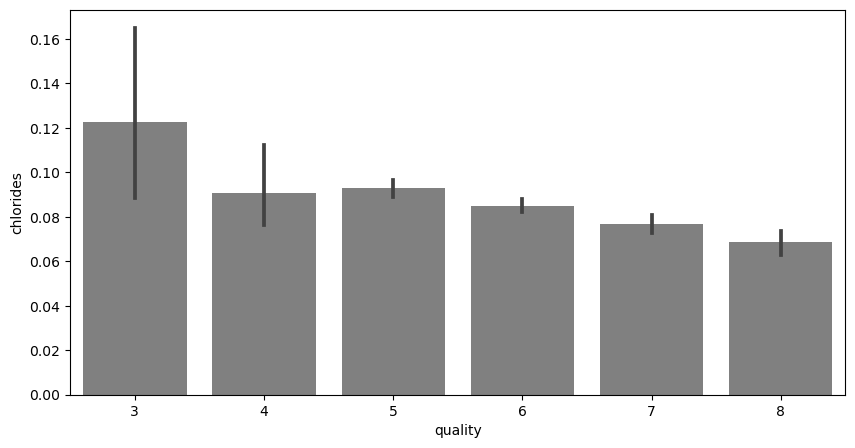

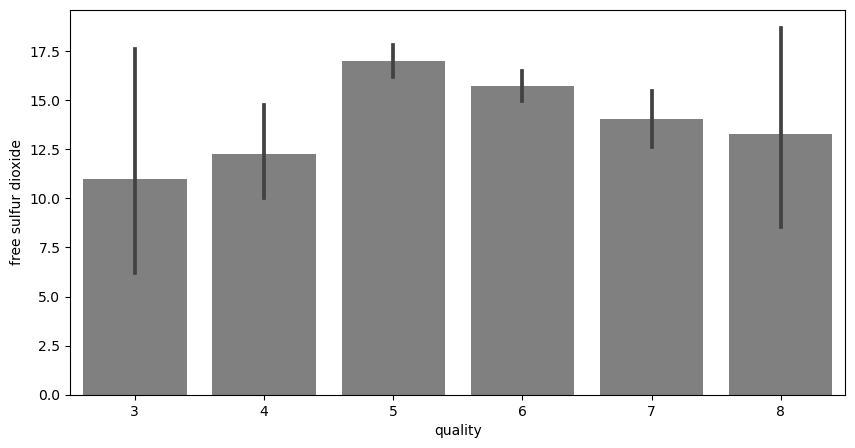

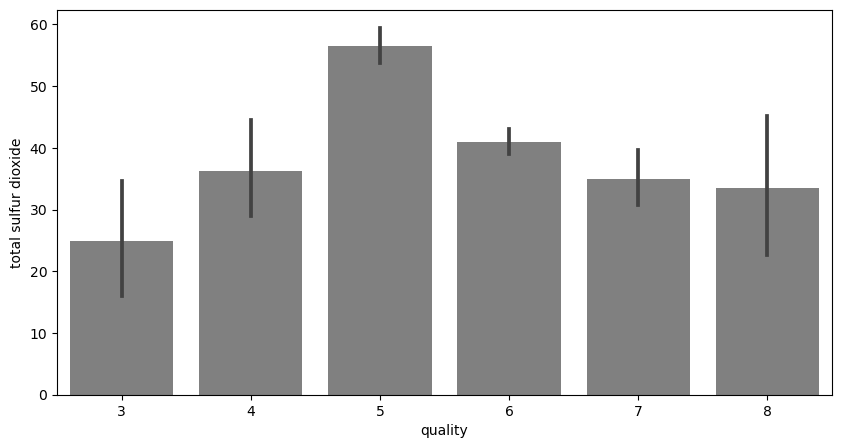

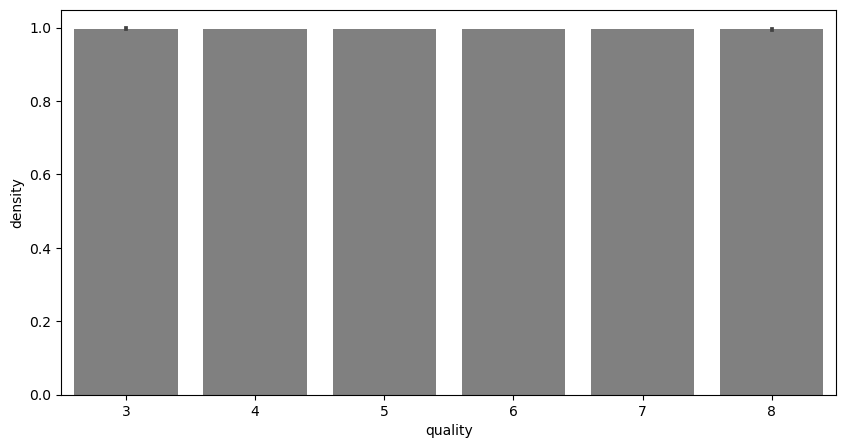

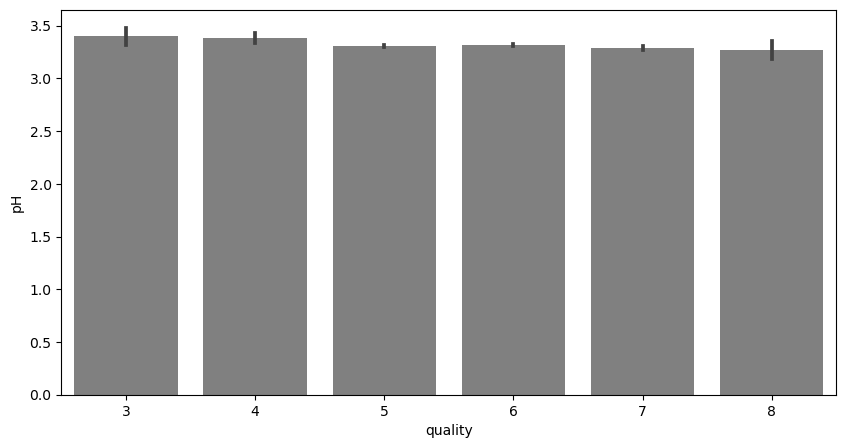

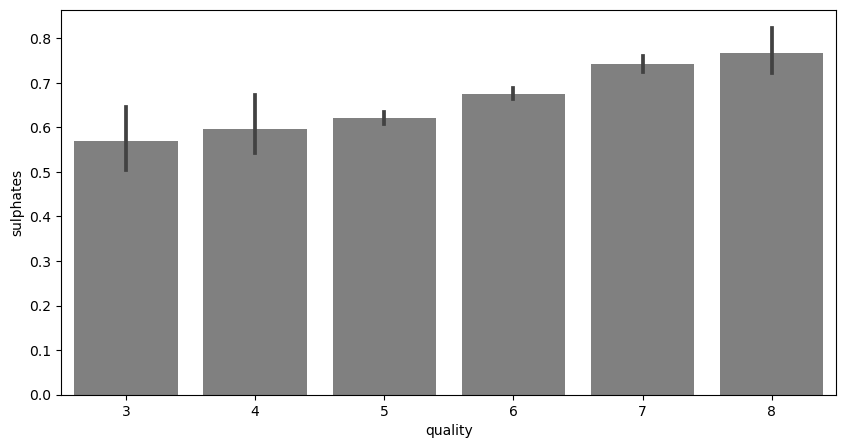

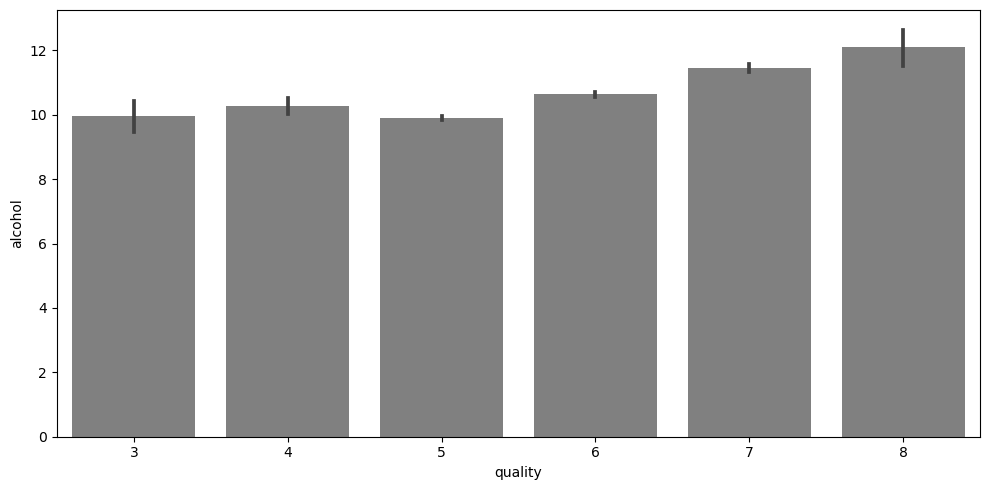

In [25]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="Grey")
plt.tight_layout()
plt.show()

In [ ]:
#The above barplots helps us to see the trend corresponding to the impact each has with respect to predicting the quality column(variable target).
#Observations regarding feature compared to the label are:
# 1)fixed acidity vs quality: no fixed pattern
# 2)volatile acidity vs quality: decreasing trend 
# 3)citric acid vs quality: increasing trend
# 4)residual sugar vs quality: no fixed pattern 
# 5)chlorides vs quality: decreasing trend
# 6)free sulfur dioxide vs quality: no fixed pattern as it is increasing then decreasing
# 7) total sulfur dioxide vs quality: no fixed pattern as it is increasing then decreasing
# 8)density vs quality: no pattern at all 
# 9)pH vs quality: no pattern at all  
# 10)sulphates vs quality: there is an increasing trend
# 11)alcohol vs quality: there is an increasing trend

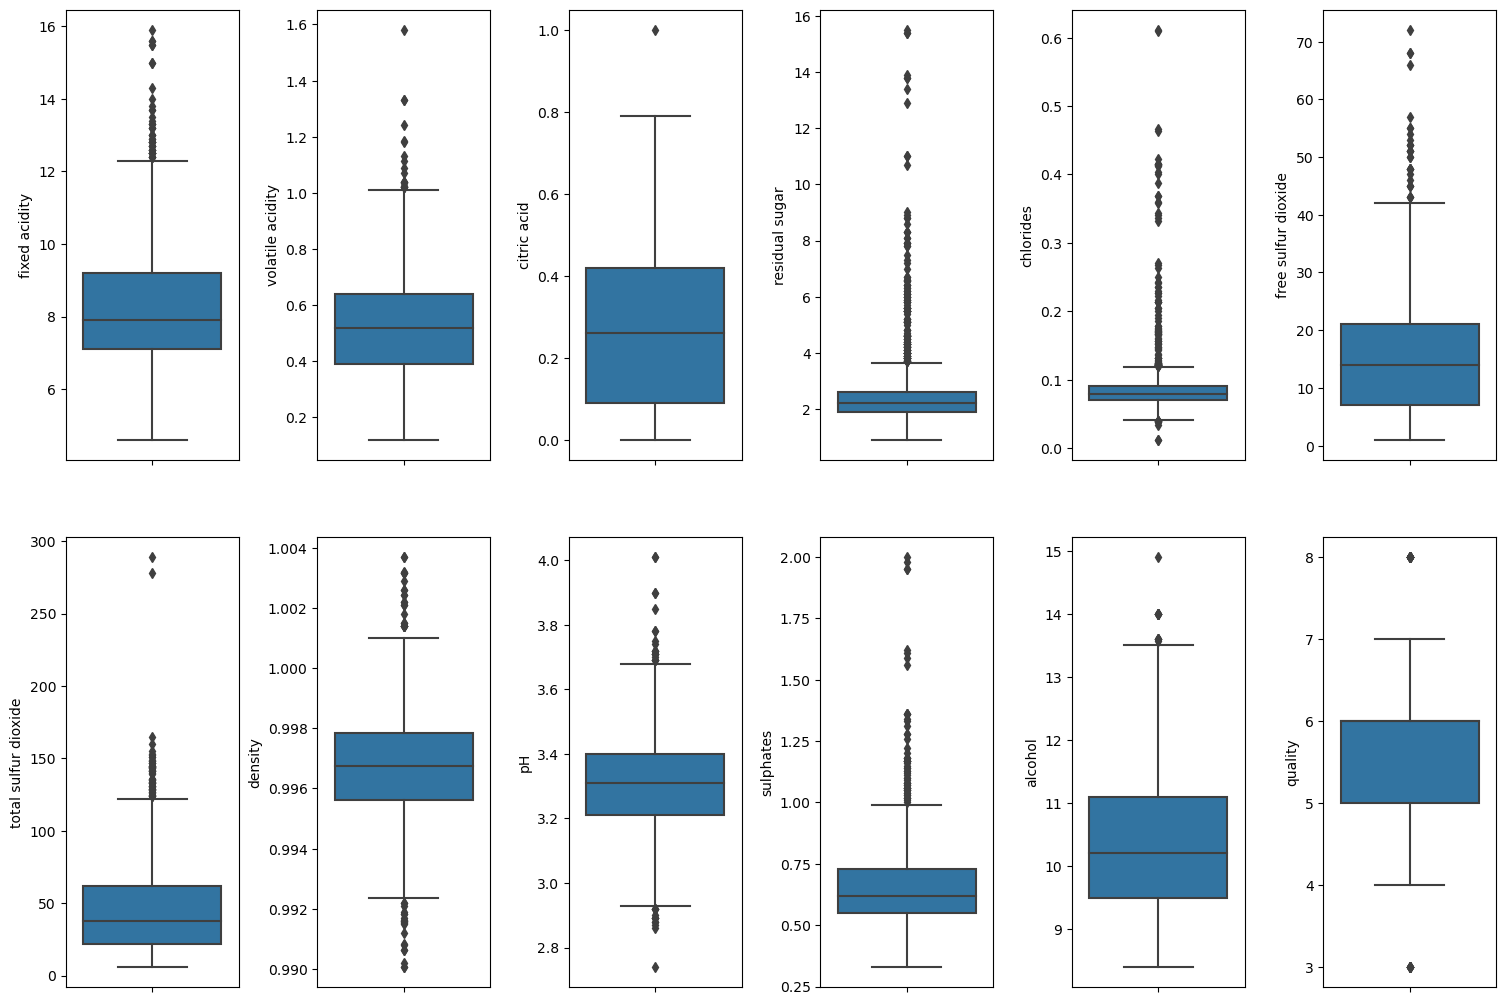

In [26]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [ ]:
#The above boxplot clearly helps us to see the outliers present.

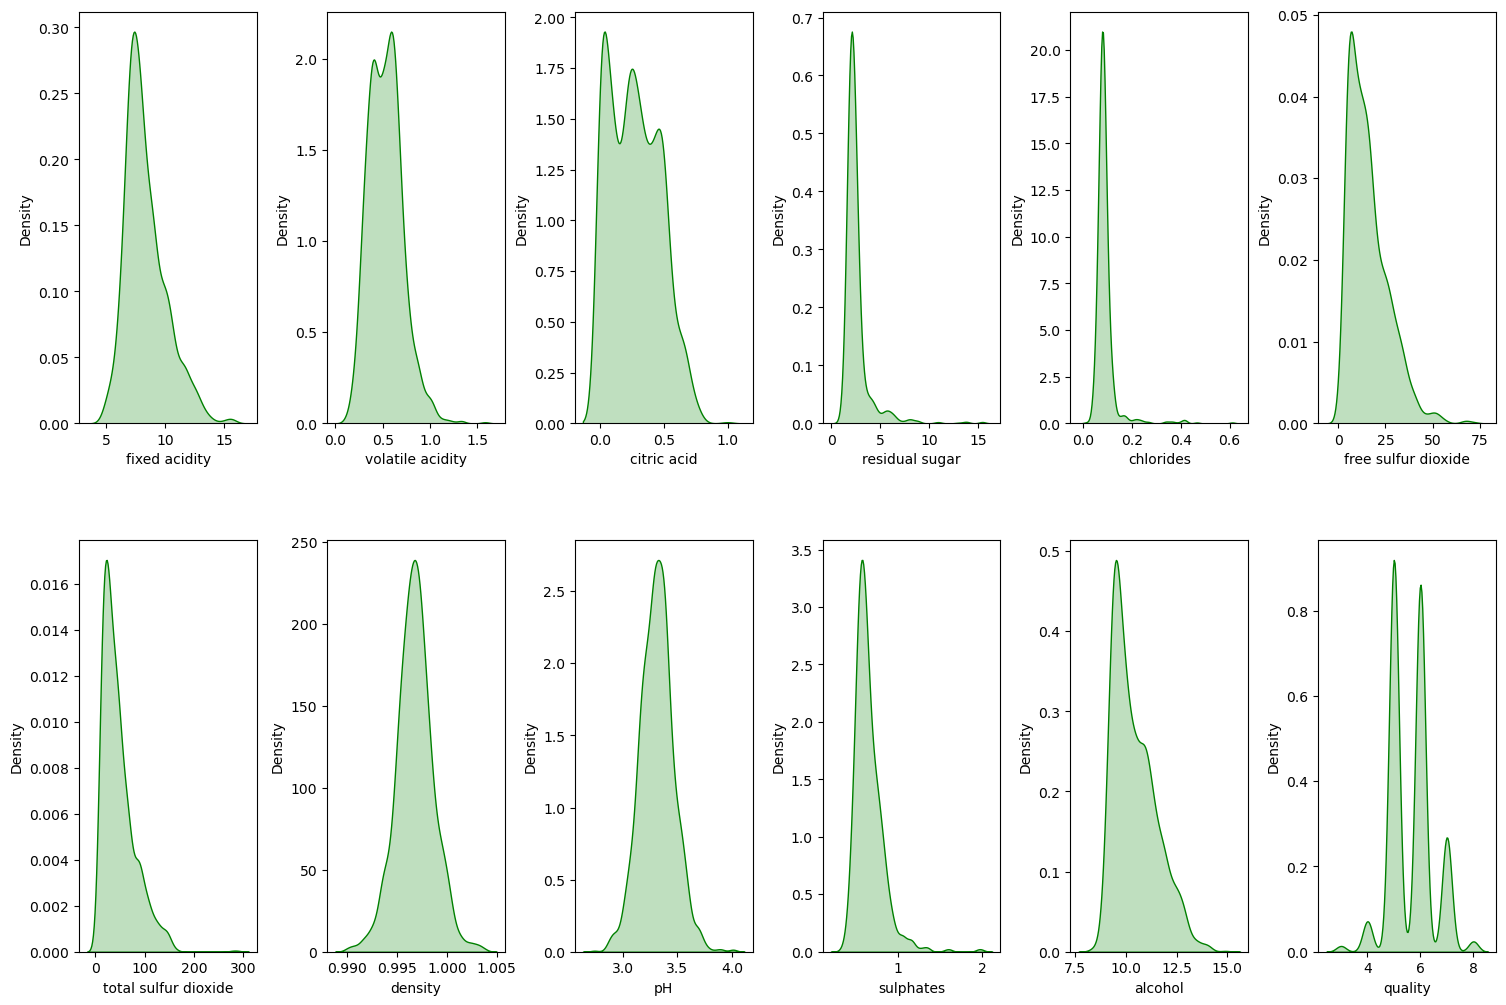

In [27]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In [ ]:
#The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

In [ ]:
#Correlation using a Heatmap

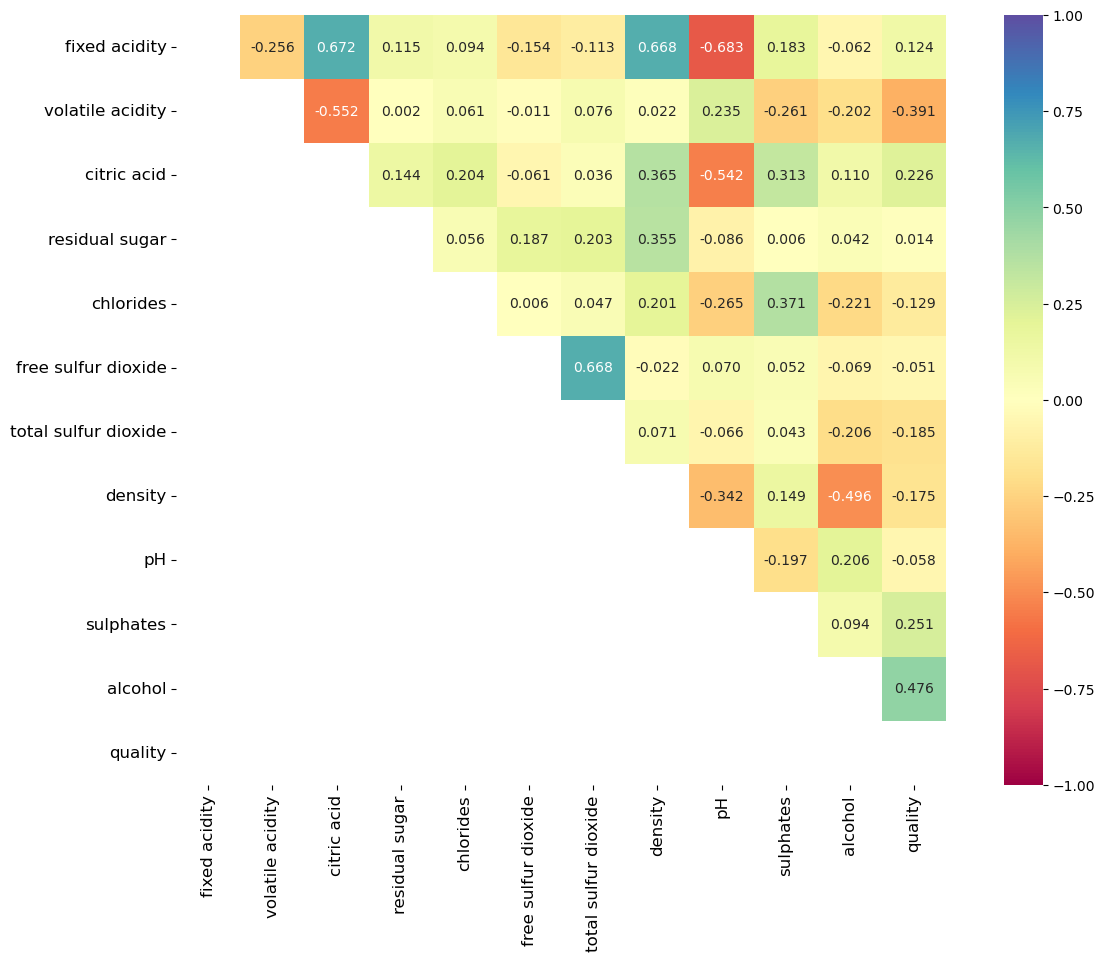

In [28]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# The above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns.

In [ ]:
# Dropping column

In [29]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# OUTLIER REMOVAL

In [30]:
df.shape

(1599, 11)

In [32]:
z=np.abs(zscore(df))      # z-score method
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
df.shape

(1464, 11)

In [34]:
# Data Loss Percentage
data_loss=(1599-1464)/1599*100 
data_loss

8.442776735459661

In [35]:
X = df.drop('quality', axis=1)         #Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label
Y = df['quality']

In [36]:
Y.value_counts()  #Taking care of class imbalance

quality
5    624
6    590
7    187
4     47
8     16
Name: count, dtype: int64

In [37]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [38]:
Y.value_counts()

quality
5    624
6    624
7    624
4    624
8    624
Name: count, dtype: int64

In [39]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [40]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [41]:
X 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,7.584189,0.354698,0.346465,1.727442,0.062921,12.725579,0.995769,3.262931,0.987487,10.466515
3116,10.820202,0.404091,0.558047,3.120877,0.073205,16.601012,0.997521,3.164024,0.658013,11.480810
3117,8.326399,0.550033,0.381386,2.838611,0.077254,17.250823,0.993159,3.202508,0.716238,13.137623
3118,7.965888,0.529458,0.349664,2.513178,0.076176,17.000000,0.992528,3.197804,0.728785,13.038505


In [ ]:
# Feature Scaling

In [42]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.650250,1.042091,-1.500725,-0.639541,-0.137051,-0.115258,0.855223,1.455176,-0.803782,-1.253138
1,-0.398916,2.053161,-1.500725,0.126931,1.101373,1.146499,0.241781,-0.764076,0.104846,-0.896143
2,-0.398916,1.379115,-1.294796,-0.201557,0.763621,0.649444,0.364470,-0.334544,-0.122311,-0.896143
3,1.737426,-1.317071,1.382288,-0.639541,-0.193343,0.878854,0.977911,-1.050431,-0.652344,-0.896143
4,-0.650250,1.042091,-1.500725,-0.639541,-0.137051,-0.115258,0.855223,1.455176,-0.803782,-1.253138
...,...,...,...,...,...,...,...,...,...,...
3115,-0.534518,-0.897489,0.282960,-0.828485,-0.873297,-0.928686,-0.390378,-0.313565,2.433111,-0.301286
3116,1.498786,-0.620045,1.372234,0.697271,-0.294364,-0.780509,0.683790,-1.021627,-0.061634,0.603959
3117,-0.068160,0.199718,0.462739,0.388201,-0.066454,-0.755663,-1.991816,-0.746120,0.379234,2.082646
3118,-0.294683,0.084148,0.299426,0.031864,-0.127160,-0.765254,-2.378902,-0.779799,0.474242,1.994184


In [ ]:
# Creating the training and testing data sets

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [ ]:
# Machine Learning Model

In [44]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)
    
    # Defined class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [45]:
model=LogisticRegression()          # Logistic Regression
classify(model, X, Y)

Accuracy Score: 90.22435897435898

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       391
           1       0.85      0.90      0.87       233

    accuracy                           0.90       624
   macro avg       0.89      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.75641025641025

Accuracy Score - Cross Validation Score is 2.4679487179487296


In [46]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.46794871794873

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       391
           1       0.89      0.91      0.90       233

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.93      0.92      0.92       624

Cross Validation Score: 90.19230769230771

Accuracy Score - Cross Validation Score is 2.275641025641022


In [47]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Accuracy Score: 91.50641025641025

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       391
           1       0.89      0.88      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.91      0.91       624
weighted avg       0.91      0.92      0.92       624

Cross Validation Score: 88.26923076923077

Accuracy Score - Cross Validation Score is 3.237179487179475


In [48]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 94.87179487179486

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       391
           1       0.93      0.94      0.93       233

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.17948717948717

Accuracy Score - Cross Validation Score is 2.6923076923076934


In [49]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 91.18589743589743

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       391
           1       0.85      0.93      0.89       233

    accuracy                           0.91       624
   macro avg       0.90      0.91      0.91       624
weighted avg       0.92      0.91      0.91       624

Cross Validation Score: 87.50000000000003

Accuracy Score - Cross Validation Score is 3.6858974358974024


In [50]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 96.15384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       391
           1       0.94      0.96      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 93.3974358974359

Accuracy Score - Cross Validation Score is 2.7564102564102626


In [55]:
!pip install xgboost
import xgboost as xgb


In [56]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.51282051282051

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       391
           1       0.92      0.97      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.75641025641026

Accuracy Score - Cross Validation Score is 2.7564102564102484


In [ ]:
# Hyper parameter tuning on the best ML Model

In [57]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [58]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [59]:
GSCV.fit(X_train,Y_train)

[LibSVM].*
optimization finished, #iter = 1610
obj = -465.911685, rho = 0.528790
nSV = 573, nBSV = 503
Total nSV = 573
.*
optimization finished, #iter = 1894
obj = -460.673437, rho = 0.571848
nSV = 579, nBSV = 510
Total nSV = 579
.
*.*
optimization finished, #iter = 2507
obj = -464.592927, rho = 0.562924
nSV = 583, nBSV = 505
Total nSV = 583
.
*.*
optimization finished, #iter = 2264
obj = -441.388672, rho = 0.591884
nSV = 557, nBSV = 480
Total nSV = 557
.
*.*
optimization finished, #iter = 2302
obj = -468.904967, rho = 0.567114
nSV = 590, nBSV = 517
Total nSV = 590
..*
optimization finished, #iter = 2782
obj = -563.623912, rho = -0.583615
nSV = 702, nBSV = 610
Total nSV = 702
[LibSVM].*.*
optimization finished, #iter = 2132
obj = -468.491401, rho = 0.561031
nSV = 591, nBSV = 506
Total nSV = 591
.
*.*
optimization finished, #iter = 2381
obj = -442.616654, rho = 0.575568
nSV = 561, nBSV = 487
Total nSV = 561
.*
optimization finished, #iter = 1801
obj = -435.033711, rho = 0.591355
nSV = 5

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

In [60]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

In [62]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]*
optimization finished, #iter = 932
obj = -422.164126, rho = 0.907540
nSV = 556, nBSV = 451
Total nSV = 556
*
optimization finished, #iter = 929
obj = -420.869700, rho = 0.965446
nSV = 555, nBSV = 434
Total nSV = 555
*
optimization finished, #iter = 826
obj = -433.806554, rho = 0.978442
nSV = 562, nBSV = 465
Total nSV = 562
*
optimization finished, #iter = 893
obj = -440.582464, rho = 1.030771
nSV = 582, nBSV = 468
Total nSV = 582
*
optimization finished, #iter = 935
obj = -423.880868, rho = 1.005875
nSV = 564, nBSV = 456
Total nSV = 564
*.*
optimization finished, #iter = 1125
obj = -522.777020, rho = -1.073235
nSV = 689, nBSV = 559
Total nSV = 689
Accuracy score for the Best Model is: 92.46794871794873


In [65]:
filename = "Wine_Analysis.pkl"
joblib.dump(Final_Model, filename)

['Wine_Analysis.pkl']